# Regresjon med prognoseskår for forverring av diabetes.

Denne notatboken ble brukt på Zoom-forelesning nr 2, 28.10.2020, se også forelesningsnotater fra timen på https://www.math.ntnu.no/emner/IST100x/ISTx1003/Zoom2InClass20201028.pdf

Spørsmål: hvilke kovariater kan gi forverret prognoseskår?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)# fordi en av plottefunksjonene må oppdateres av utvikler og kommer per i dag med lang FutureWarning som vi ikke vil se på
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# Steg 1: Bli kjent med dataene ved å se på oppsummeringsmål og ulike typer plott

Datasettet inneholder flere kovariater enn vi ser på i forelesningen, se i slutten av filen for tilpasning der de også er med. Vi ser på age, sex, bmi, ldl og hdl kolesterol.

In [2]:
filurl="https://web.stanford.edu/~hastie/CASI_files/DATA/diabetes.csv" # fra lærebok i statistisk læring
df=pd.read_csv(filurl) 
print(df.shape)
df.head() # vi ser vi har 442 observasjoner av 11 varialber - en er repons (prog)

(442, 11)


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
0,59,1,32.1,101.0,157,93.2,38.0,4.0,2.11,87,151
1,48,0,21.6,87.0,183,103.2,70.0,3.0,1.69,69,75
2,72,1,30.5,93.0,156,93.6,41.0,4.0,2.03,85,141
3,24,0,25.3,84.0,198,131.4,40.0,5.0,2.12,89,206
4,50,0,23.0,101.0,192,125.4,52.0,4.0,1.86,80,135


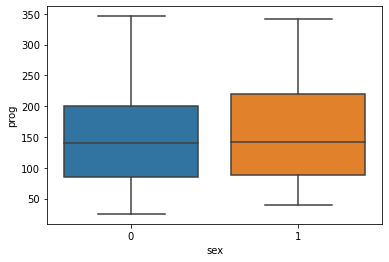

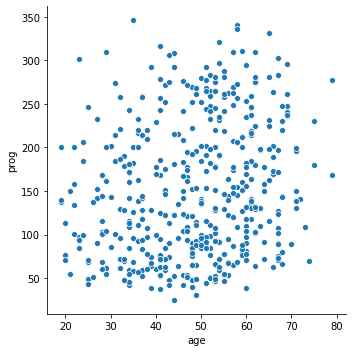

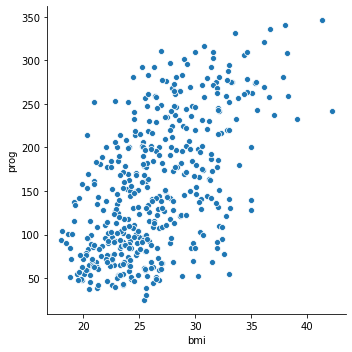

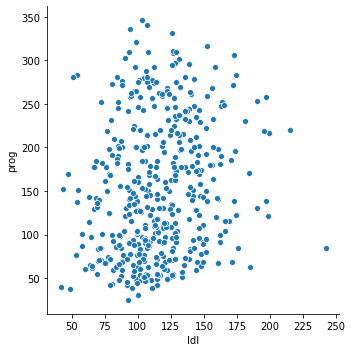

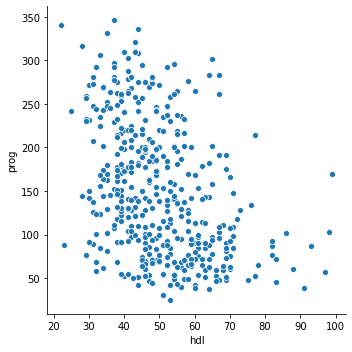

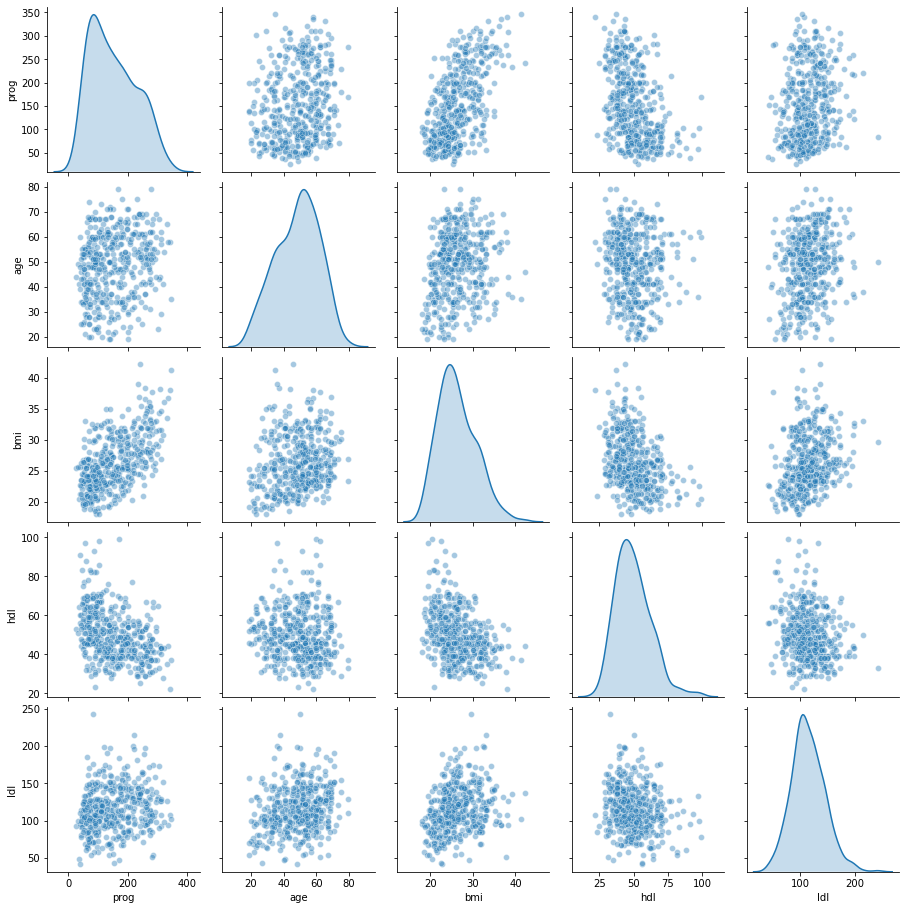

In [3]:
# boksplott av kategoriske variabler
# kryssplott av kontinuerlige varialber

ax = sns.boxplot(x="sex", y="prog", data=df)
plt.show()
sns.relplot(x='age', y='prog',data = df)
plt.show()
sns.relplot(x='bmi', y='prog',data = df)
plt.show()
sns.relplot(x='ldl', y='prog',data = df)
plt.show()
sns.relplot(x='hdl', y='prog',data = df)
plt.show()

# et fancy plott der alle kontinuerlige er sammen - og der ser vi også om kovariatene varierer sammen
sns.pairplot(df, vars = ['prog','age', 'bmi','hdl','ldl'],
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

# Steg 2: Spesifiser en matematisk modell 

In [4]:
formel='prog~age+sex+bmi+ldl+hdl'

# andre formler kunne vært 
#formel='prog~ldl' # for enkel lineær regresjon med bare ldl
#formel='prog~age+sex+bmi+map+tc+ldl+hdl+tch+ltg+glu' # hvis alt i data skulle med


# Steg 3: Initialiser og tilpass modellen

In [5]:
modell = smf.ols(formel,data=df)
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede modellen 

Her er det vi skal gjøre alt arbeidet - vi skal forstå de ulike delene av utskriften!

In [6]:
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                   prog   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.66
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           5.50e-46
Time:                        12:34:44   Log-Likelihood:                -2435.0
No. Observations:                 442   AIC:                             4882.
Df Residuals:                     436   BIC:                             4907.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.1287     28.518     -0.531      0.5

## Legg til tullekovariat for å se hva som skjer med R^2

In [7]:
np.random.seed(0)
IQ = np.random.normal(100,16,442)
formel2='prog~age+sex+bmi+ldl+hdl+IQ'

modell2 = smf.ols(formel2,data=df)
resultat2 = modell2.fit()
print(resultat2.summary())
print(resultat2.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                   prog   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     47.96
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           4.20e-45
Time:                        12:34:44   Log-Likelihood:                -2435.0
No. Observations:                 442   AIC:                             4884.
Df Residuals:                     435   BIC:                             4913.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.3360     33.040     -0.616      0.5

# Steg 5: Evaluer om modellen passer til dataene

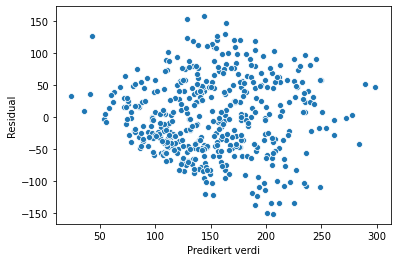

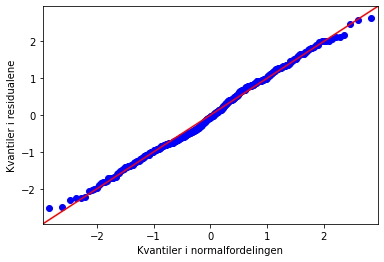

In [8]:
sns.scatterplot(resultat.fittedvalues, resultat.resid)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()

# Til slutt: tar med alle kovariatene

                            OLS Regression Results                            
Dep. Variable:                   prog   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     46.25
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           4.01e-62
Time:                        12:34:44   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -356.6440     67.020     -5.321      0.0

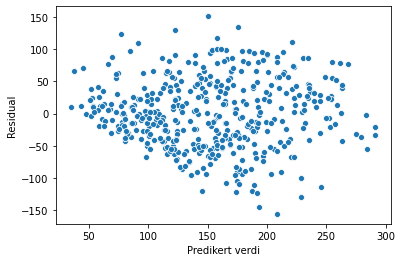

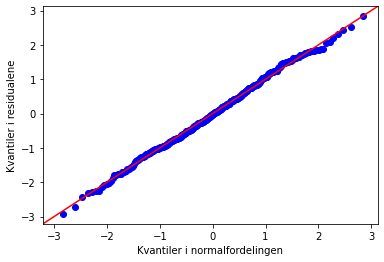

In [9]:
formel='prog~age+sex+bmi+map+tc+ldl+hdl+tch+ltg+glu' # hvis alt i data skulle med
modell = smf.ols(formel,data=df)
resultat = modell.fit()
print(resultat.summary())

sns.scatterplot(resultat.fittedvalues, resultat.resid)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()